In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, datasets

In [3]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
print(f'Data Shape: \t{train_data.shape}')
print(f'Label Shape: \t{train_labels.shape}')
print(train_data[0])
print(f'Label: \t\t{train_labels[0]}')

Data Shape: 	(25000,)
Label Shape: 	(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 		1


In [5]:
word_index = datasets.imdb.get_word_index()
print(type(word_index))
list(word_index.items())[:5]

1641221/1641221 [==============================] - 0s 0us/step
<class 'dict'>


[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951)]

In [6]:
reverse_word_index = {value: key for (key, value) in word_index.items()}
list(reverse_word_index.items())[:5]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani')]

In [7]:
def decode_review(word_indices):
    codes = ["<P>", "<S>", "_____"]
    return ' '.join([reverse_word_index[i-3] if i > 3 else codes[i] for i in word_indices])

print(decode_review(train_data[0]))

<S> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert _____ is an amazing actor and now the same being director _____ father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for _____ and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also _____ to the two little boy's that played the _____ of norman and paul they were just brilliant children are often left out of the _____ list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what th

In [8]:
def sentiment(value):
    return "Positive" if value == 1 else "Negative"

In [9]:
for i in range(15):
    print(len(train_data[i]))

218
189
141
550
147
43
123
562
233
130
450
99
117
238
109


In [10]:
def vectorize(data, dimensions):
    multihot = np.zeros(dimensions)
    for i in data:
        multihot[i] = 1
    return multihot

vectorize(train_data[0], 10000)

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
def vectorize(data, dimensions):
    multihot = np.zeros((len(data),dimensions))
    for row, column in enumerate(data):
        multihot[row, column] = 1
    return multihot

vectorize(train_data, 10000)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
x_train = vectorize(train_data, 10000)
x_test = vectorize(test_data, 10000)

print(f'Train: {x_train.shape} Test: {x_test.shape}')

Train: (25000, 10000) Test: (25000, 10000)


In [13]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

(y_train, y_test)

(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

In [14]:
tf.random.set_seed(42)

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 128)               2176      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 162321 (634.07 KB)
Trainable params: 162321 (634.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=30, batch_size=2000, validation_split=0.1)


Epoch 1/30


12/12 [==============================] - 1s 33ms/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.5496 - val_accuracy: 0.7528
Epoch 2/30
12/12 [==============================] - 0s 16ms/step - loss: 0.4686 - accuracy: 0.8215 - val_loss: 0.3959 - val_accuracy: 0.8656
Epoch 3/30
12/12 [==============================] - 0s 15ms/step - loss: 0.3609 - accuracy: 0.8721 - val_loss: 0.3319 - val_accuracy: 0.8784
Epoch 4/30
12/12 [==============================] - 0s 15ms/step - loss: 0.3003 - accuracy: 0.8924 - val_loss: 0.3099 - val_accuracy: 0.8780
Epoch 5/30
12/12 [==============================] - 0s 15ms/step - loss: 0.2595 - accuracy: 0.9062 - val_loss: 0.2869 - val_accuracy: 0.8848
Epoch 6/30
12/12 [==============================] - 0s 15ms/step - loss: 0.2374 - accuracy: 0.9124 - val_loss: 0.2830 - val_accuracy: 0.8860
Epoch 7/30
12/12 [==============================] - 0s 16ms/step - loss: 0.2038 - accuracy: 0.9296 - val_loss: 0.2812 - val_accuracy: 0.8864
Epoch 8/30

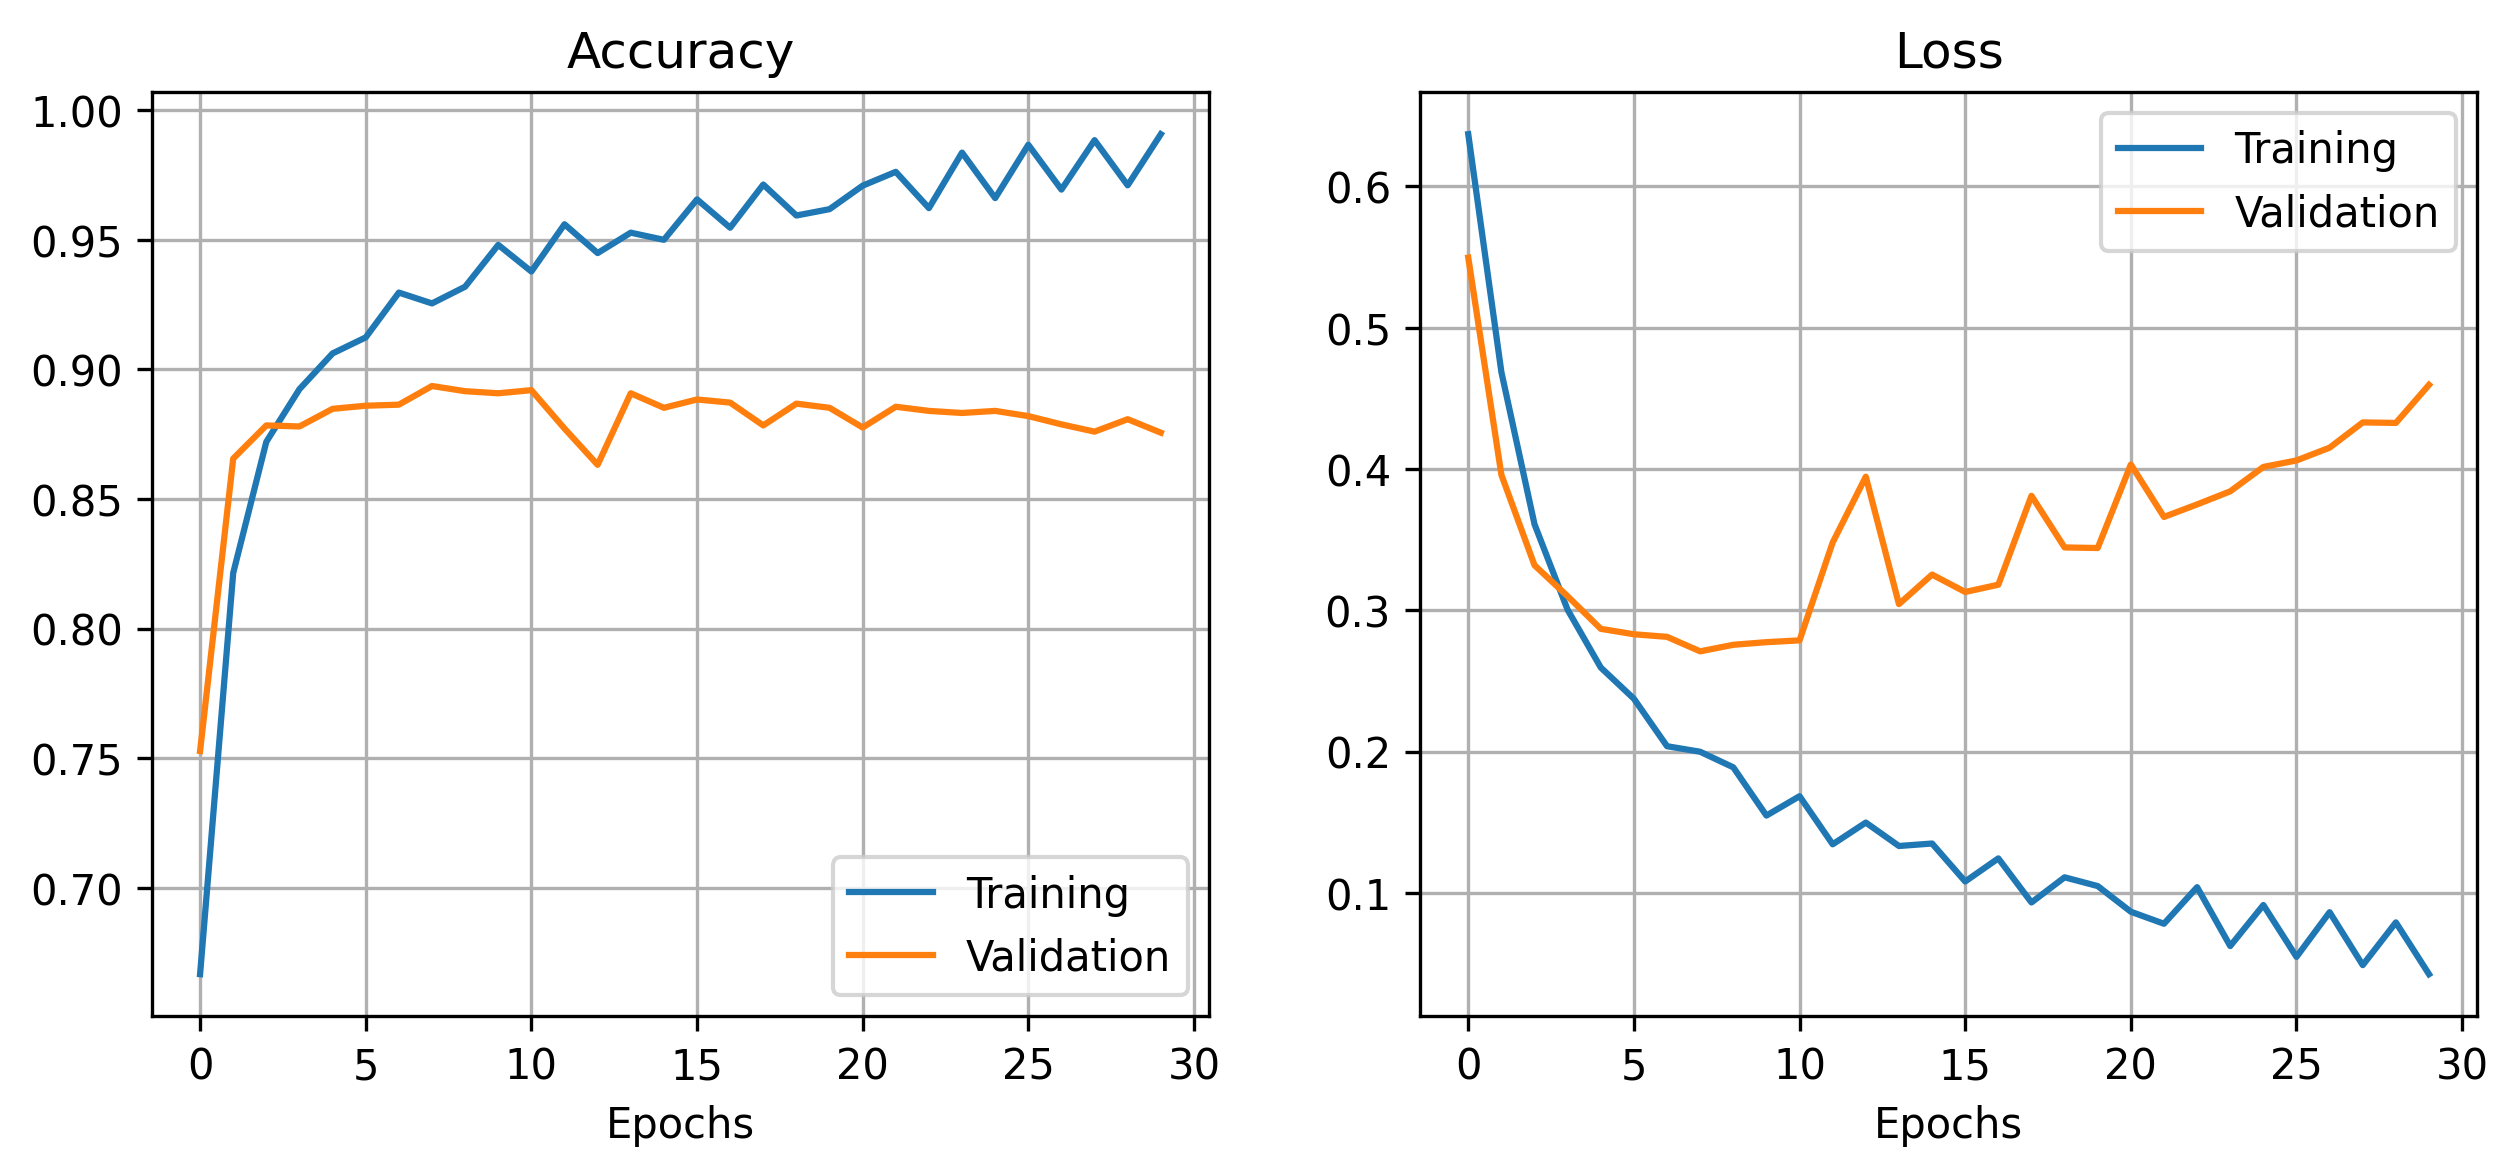

In [19]:
def plot_history(history):
    accuracy = history['accuracy']
    loss = history['loss']
    val_accuracy = history['val_accuracy']
    val_loss = history['val_loss']
    (figure, axes) = plt.subplots(1, 2, figsize=(10,4), dpi=300)
    axes[0].plot(accuracy, label='Training')
    axes[0].plot(val_accuracy, label='Validation')
    axes[0].legend()
    axes[0].set_xlabel('Epochs')
    axes[0].grid()
    axes[0].set_title('Accuracy')
    axes[1].plot(loss, label='Training')
    axes[1].plot(val_loss, label='Validation')
    axes[1].legend()
    axes[1].set_xlabel('Epochs')
    axes[1].grid()
    axes[1].set_title('Loss')
    plt.show()

plot_history(training_history.history)

Epoch 1/15
704/704 [==============================] - 3s 3ms/step - loss: 0.3247 - accuracy: 0.8639 - val_loss: 0.3001 - val_accuracy: 0.8824
Epoch 2/15
704/704 [==============================] - 2s 3ms/step - loss: 0.2030 - accuracy: 0.9217 - val_loss: 0.3513 - val_accuracy: 0.8736
Epoch 3/15
704/704 [==============================] - 2s 3ms/step - loss: 0.1533 - accuracy: 0.9451 - val_loss: 0.3622 - val_accuracy: 0.8872
Epoch 4/15
704/704 [==============================] - 2s 3ms/step - loss: 0.1079 - accuracy: 0.9655 - val_loss: 0.4273 - val_accuracy: 0.8868
Epoch 5/15
704/704 [==============================] - 2s 3ms/step - loss: 0.0659 - accuracy: 0.9804 - val_loss: 0.5498 - val_accuracy: 0.8748
Epoch 6/15
704/704 [==============================] - 2s 3ms/step - loss: 0.0380 - accuracy: 0.9899 - val_loss: 0.7509 - val_accuracy: 0.8848
Epoch 7/15
704/704 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.8866 - val_accuracy: 0.8764
Epoch 

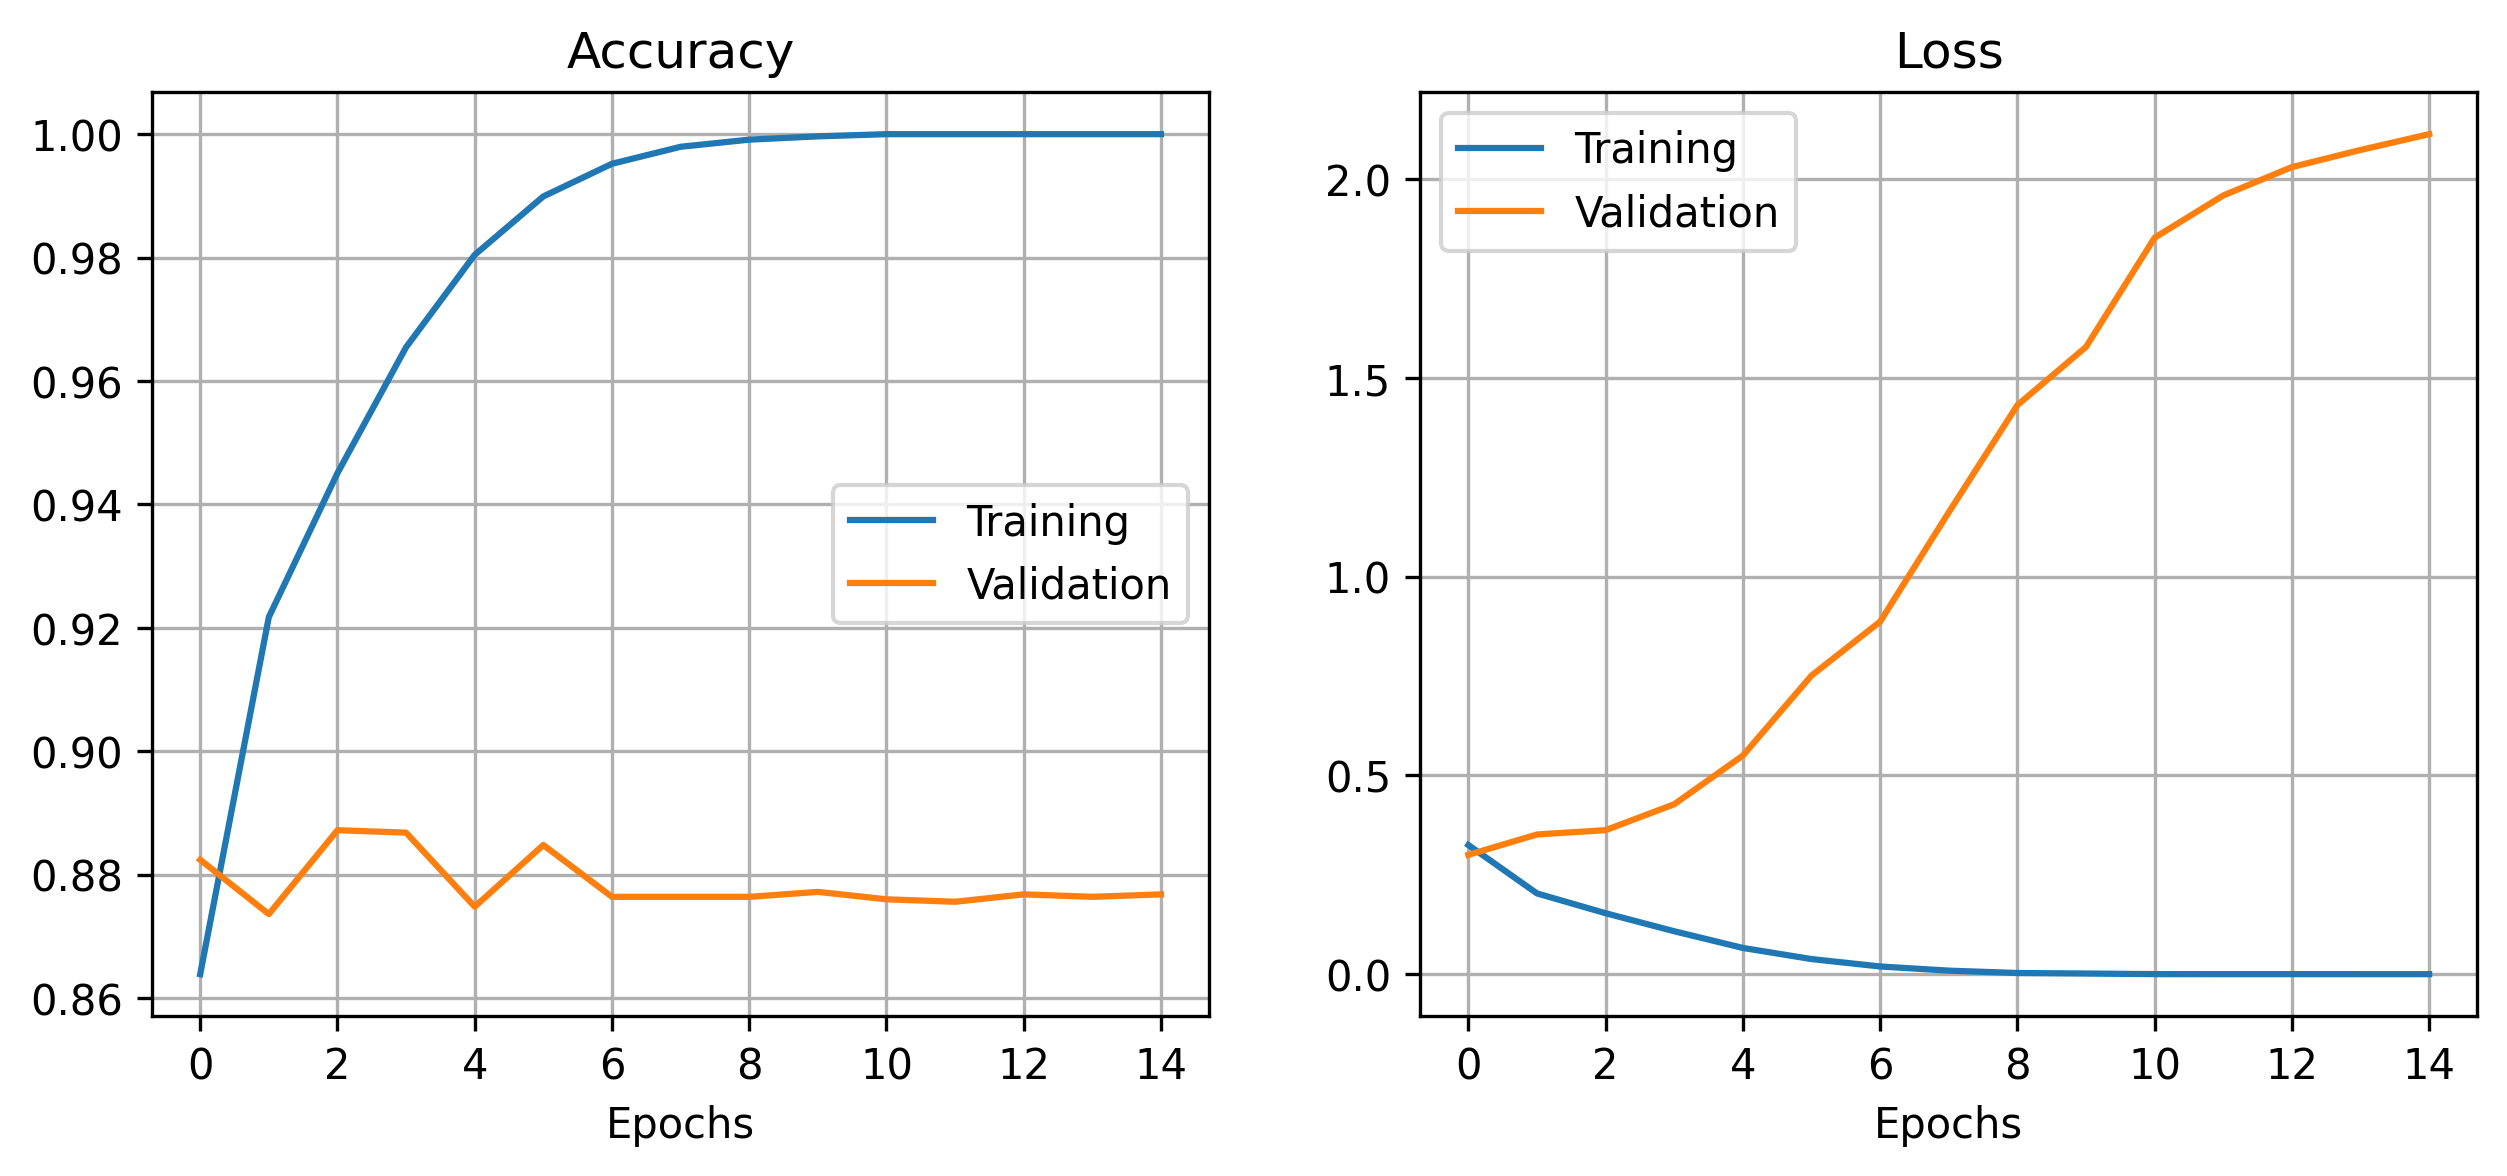

In [20]:
model = models.Sequential()
model.add(layers.Dense(80, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

training_history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.1)
plot_history(training_history.history)

In [21]:
predictions = model.predict(x_test)

(predictions, predictions.shape)

782/782 [==============================] - 1s 1ms/step


(array([[2.7707443e-02],
        [1.0000000e+00],
        [1.0000000e+00],
        ...,
        [3.0602388e-02],
        [5.5983542e-16],
        [5.0054468e-06]], dtype=float32),
 (25000, 1))

In [22]:
for i in range(5):
    print("--------------------------------")
    print(f'Label: {sentiment(y_test[i])} Prediction: {"Positive" if predictions[i] > 0.5 else "Negative"}')
    print("--------------------------------")
    print(f'Review:\n{decode_review(test_data[i])}')


--------------------------------
Label: Negative Prediction: Negative
--------------------------------
Review:
<S> please give this one a miss br br _____ _____ and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite _____ so all you madison fans give this a miss
--------------------------------
Label: Positive Prediction: Positive
--------------------------------
Review:
<S> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances _____ the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere _____ with sexual tension and psychological _____ it's very interesting that robert altman directed this considering the style

In [23]:
model.evaluate(x_test, y_test, verbose=0)

[2.0570850372314453, 0.8654800057411194]